In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def PROGONKA(A, B):
    u = np.zeros_like(B)
    v = np.zeros_like(B)
    x = np.zeros_like(B)
    n = len(B)
    v[0] = A[0, 1] / (-A[0, 0])
    u[0] = (-B[0]) / (-A[0, 0])

    for i in range(len(B) - 1):
        v[i] = -A[i, i + 1] / (A[i, i] + A[i, i - 1] * v[i - 1])
        u[i] = (-A[i, i - 1] * u[i - 1] + B[i]) / (A[i, i] + A[i, i - 1] * v[i - 1])

    v[n - 1] = 0;
    u[n - 1] = (A[n - 1, n - 2] * u[n - 2] - B[n - 1]) / (-A[n - 1, n - 1] - A[n - 1, n - 2] * v[n - 2])
    x[n - 1] = u[n - 1];
    for i in range(n - 2, -1, -1):
        x[i] = v[i] * x[i + 1] + u[i]

    return x




In [ ]:
def stability(sigma):
  if sigma<1: return True
  else:
    print(f"явная схема неустойчива при sigma={sigma}")
    return False

In [ ]:
a = 1

l = np.pi/2
phi0 = lambda t: math.cos(2*t)
phi1 = lambda t: 0
psi1 = lambda x:math.exp(-x)*math.cos(x) #для t=0
psi2 = lambda x:0 #для гранич условия с производной при t=0

U_true = lambda x,t:math.exp(-x)*math.cos(x)*math.cos(2*t)

b=2
c=-2
h = 0.1 #float(input())  #шаг по х
tau = 0.0045 #float(input()) #шаг по t

#x = np.arange(0, l + h, h)
x = np.linspace(0, l, round(l/h))
#t = np.arange(0, 1+tau, tau)
t = np.linspace(0, 1, round(1/tau))


In [ ]:
U_true_m = np.zeros((len(t),len(x)))
for k in range(len(t)):
   for i in range(len(x)):
      U_true_m[k, i] = U_true(x[i], t[k])

Явная схема

In [ ]:
def first_method(x,t, tau, h):
  U_1 = np.zeros((len(t),len(x)))
  for i in range(len(t)):
      U_1[i,0] = phi0(t[i])
      U_1[i, -1] = 0
  for i in range(len(x) - 1):
      U_1[0, i] = psi1(x[i])
      U_1[1, i] = tau * psi2(x[i]) + U_1[0, i]

  for k in range(1, len(t) - 1):
      for j in range(1, len(x) - 1):
          U_1[k + 1, j] = (tau ** 2 / h ** 2) * (U_1[k, j + 1]) - \
                2 * (tau ** 2 / h ** 2) * (U_1[k, j]) + (tau ** 2 / h ** 2) * \
                U_1[k, j - 1] + (tau ** 2 / h) * (U_1[k, j + 1] - U_1[k, j - 1]) - \
                2 * (tau**2) * U_1[k, j] + 2* U_1[k, j] - U_1[k-1, j]
  return U_1

print(x[-1])
df = pd.DataFrame(data=first_method(x,t,tau,h), index=t, columns=x)
df

1.5707963267948966


,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,0.0
0.004525,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,0.0
0.009050,0.999836,0.895569,0.793250,0.694597,0.600866,0.512978,0.431566,0.357013,0.289496,0.229019,0.175446,0.128531,0.087942,0.053286,0.024127,0.0
0.013575,0.999631,0.895421,0.793119,0.694483,0.600768,0.512894,0.431495,0.356955,0.289449,0.228982,0.175418,0.128511,0.087929,0.053279,0.024124,0.0
0.018100,0.999345,0.895199,0.792923,0.694312,0.600620,0.512769,0.431390,0.356868,0.289379,0.228927,0.175376,0.128480,0.087908,0.053267,0.024119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,-0.382966,-0.341925,-0.301938,-0.263614,-0.227272,-0.193251,-0.161949,-0.133383,-0.107649,-0.084849,-0.064839,-0.047439,-0.032478,-0.019710,-0.008949,0.0
0.986425,-0.391310,-0.349385,-0.308538,-0.269386,-0.232268,-0.197517,-0.165548,-0.136386,-0.110109,-0.086807,-0.066343,-0.048546,-0.033239,-0.020173,-0.009159,0.0
0.990950,-0.399622,-0.356816,-0.315113,-0.275135,-0.237245,-0.201767,-0.169133,-0.139378,-0.112560,-0.088758,-0.067842,-0.049649,-0.033997,-0.020634,-0.009369,0.0
0.995475,-0.407901,-0.364218,-0.321662,-0.280863,-0.242203,-0.206001,-0.172705,-0.142358,-0.115002,-0.090703,-0.069336,-0.050748,-0.034753,-0.021093,-0.009578,0.0


In [ ]:
df = pd.DataFrame(data=U_true_m, index=t, columns=x)
#pd.options.display.float_format = '{:20,.2f}'.format
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,1.272895e-17
0.004525,0.999959,0.895607,0.793283,0.694626,0.600891,0.512999,0.431583,0.357027,0.289507,0.229028,0.175453,0.128536,0.087946,0.053288,0.024127,1.272843e-17
0.009050,0.999836,0.895497,0.793186,0.694540,0.600817,0.512936,0.431530,0.356983,0.289472,0.229000,0.175431,0.128520,0.087935,0.053282,0.024124,1.272687e-17
0.013575,0.999631,0.895313,0.793023,0.694398,0.600694,0.512831,0.431442,0.356910,0.289412,0.228953,0.175395,0.128494,0.087917,0.053271,0.024119,1.272426e-17
0.018100,0.999345,0.895057,0.792796,0.694199,0.600522,0.512684,0.431318,0.356808,0.289329,0.228887,0.175345,0.128457,0.087892,0.053256,0.024112,1.272061e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,-0.382966,-0.343001,-0.303813,-0.266029,-0.230130,-0.196469,-0.165288,-0.136735,-0.110876,-0.087713,-0.067195,-0.049227,-0.033682,-0.020408,-0.009240,-4.874752e-18
0.986425,-0.391310,-0.350474,-0.310432,-0.271825,-0.235144,-0.200750,-0.168890,-0.139714,-0.113292,-0.089624,-0.068659,-0.050299,-0.034415,-0.020853,-0.009442,-4.980963e-18
0.990950,-0.399622,-0.357919,-0.317026,-0.277599,-0.240139,-0.205014,-0.172477,-0.142682,-0.115698,-0.091528,-0.070118,-0.051368,-0.035146,-0.021296,-0.009642,-5.086766e-18
0.995475,-0.407901,-0.365334,-0.323594,-0.283350,-0.245114,-0.209261,-0.176050,-0.145638,-0.118095,-0.093424,-0.071570,-0.052432,-0.035875,-0.021737,-0.009842,-5.192152e-18


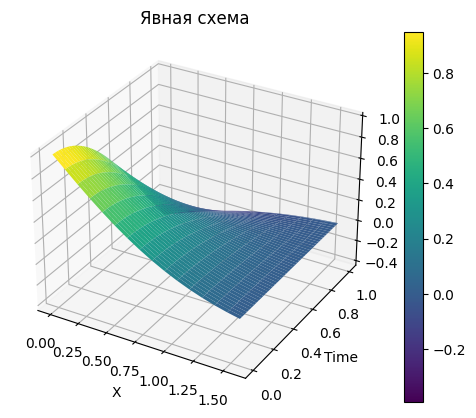

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(first_method(x,t,tau,h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('Явная схема')
fig.colorbar(surf)

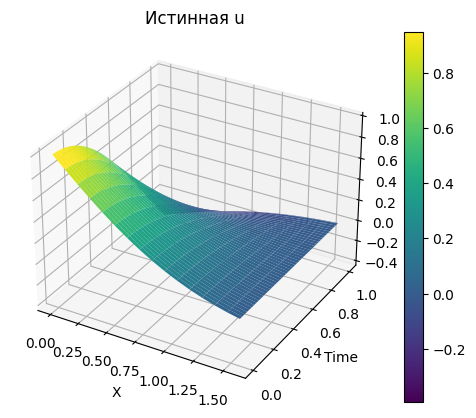

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(U_true_m), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('Истинная u')
fig.colorbar(surf)

Неявная схема

In [ ]:
def second_method(x,t,tau, h):
  U_2 = np.zeros((len(t),len(x)))
  for i in range(len(t)):
     U_2[i,0] = phi0(t[i])
     U_2[i, -1] = 0
  for i in range(len(x) - 1):
      U_2[0, i] = psi1(x[i])
      U_2[1, i] = tau * psi2(x[i]) + U_2[0, i]

  for k in range(1, len(t) -1):
#расчет для k=1
    A = np.zeros((len(x)-2, len(x)-2))
    B = np.zeros((len(x)-2))
    A[0,0] = -1 - 2 * tau**2/h**2 +c*tau**2
    A[0,1] = tau**2/h**2 + b*tau**2/(2*h)
    B[0] =  - 2*U_2[k, 1] + U_2[k-1, 1] \
            - U_2[k + 1, 0]*(tau**2/h**2 - b*tau**2/(2*h))

    A[-1, -1] = -1 - 2 * tau**2/h**2 +c*tau**2
    A[-1, -2] =  tau**2/h**2 - b*tau**2/(2*h)
    B[-1] = - 2*U_2[k, -2] + U_2[k-1, -2] \
            - U_2[k + 1, -1]*(tau**2/h**2 + b*tau**2/(2*h))

    for i in range(1, len(x)-3):
        A[i, i-1] = tau**2/h**2 - b*tau**2/(2*h)
        A[i,i] = -1 - 2 * tau**2/h**2 +c*tau**2
        A[i, i+1] = tau**2/h**2 + b*tau**2/(2*h)
        B[i] = - 2*U_2[k, i + 1] + U_2[k-1, i + 1]
    U_vrem = PROGONKA(A,B)
    for i in range(1, len(x)-1):
        U_2[k+1, i] = U_vrem[i-1]
  return U_2




In [ ]:
df = pd.DataFrame(data=second_method(x,t,tau, h), index=t, columns=x)
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,0.0
0.004525,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,0.0
0.009050,0.999836,0.895569,0.793250,0.694597,0.600866,0.512978,0.431566,0.357013,0.289496,0.229019,0.175446,0.128531,0.087942,0.053286,0.024127,0.0
0.013575,0.999631,0.895421,0.793119,0.694483,0.600768,0.512894,0.431495,0.356955,0.289449,0.228982,0.175418,0.128511,0.087929,0.053279,0.024124,0.0
0.018100,0.999345,0.895198,0.792923,0.694312,0.600620,0.512769,0.431390,0.356868,0.289379,0.228927,0.175376,0.128480,0.087908,0.053267,0.024119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,-0.382966,-0.340346,-0.299384,-0.260520,-0.224013,-0.190113,-0.159059,-0.130868,-0.105573,-0.083186,-0.063558,-0.046501,-0.031828,-0.019316,-0.008769,0.0
0.986425,-0.391310,-0.347800,-0.305972,-0.266278,-0.228990,-0.194360,-0.162640,-0.133850,-0.108011,-0.085126,-0.065049,-0.047598,-0.032582,-0.019774,-0.008978,0.0
0.990950,-0.399622,-0.355226,-0.312536,-0.272015,-0.233949,-0.198592,-0.166207,-0.136821,-0.110440,-0.087059,-0.066536,-0.048691,-0.033333,-0.020231,-0.009186,0.0
0.995475,-0.407901,-0.362623,-0.319074,-0.277729,-0.238888,-0.202808,-0.169761,-0.139780,-0.112861,-0.088986,-0.068017,-0.049781,-0.034082,-0.020687,-0.009393,0.0


In [ ]:
df = pd.DataFrame(data=U_true_m, index=t, columns=x)
#pd.options.display.float_format = '{:20,.2f}'.format
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,1.272895e-17
0.004525,0.999959,0.895607,0.793283,0.694626,0.600891,0.512999,0.431583,0.357027,0.289507,0.229028,0.175453,0.128536,0.087946,0.053288,0.024127,1.272843e-17
0.009050,0.999836,0.895497,0.793186,0.694540,0.600817,0.512936,0.431530,0.356983,0.289472,0.229000,0.175431,0.128520,0.087935,0.053282,0.024124,1.272687e-17
0.013575,0.999631,0.895313,0.793023,0.694398,0.600694,0.512831,0.431442,0.356910,0.289412,0.228953,0.175395,0.128494,0.087917,0.053271,0.024119,1.272426e-17
0.018100,0.999345,0.895057,0.792796,0.694199,0.600522,0.512684,0.431318,0.356808,0.289329,0.228887,0.175345,0.128457,0.087892,0.053256,0.024112,1.272061e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,-0.382966,-0.343001,-0.303813,-0.266029,-0.230130,-0.196469,-0.165288,-0.136735,-0.110876,-0.087713,-0.067195,-0.049227,-0.033682,-0.020408,-0.009240,-4.874752e-18
0.986425,-0.391310,-0.350474,-0.310432,-0.271825,-0.235144,-0.200750,-0.168890,-0.139714,-0.113292,-0.089624,-0.068659,-0.050299,-0.034415,-0.020853,-0.009442,-4.980963e-18
0.990950,-0.399622,-0.357919,-0.317026,-0.277599,-0.240139,-0.205014,-0.172477,-0.142682,-0.115698,-0.091528,-0.070118,-0.051368,-0.035146,-0.021296,-0.009642,-5.086766e-18
0.995475,-0.407901,-0.365334,-0.323594,-0.283350,-0.245114,-0.209261,-0.176050,-0.145638,-0.118095,-0.093424,-0.071570,-0.052432,-0.035875,-0.021737,-0.009842,-5.192152e-18


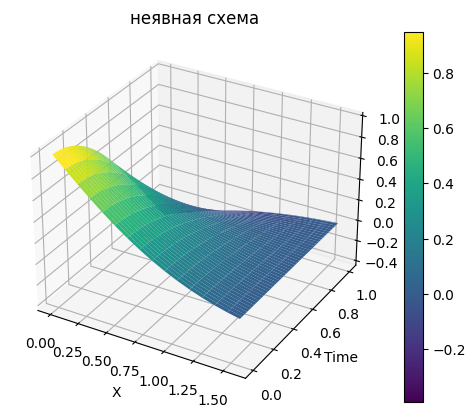

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(second_method(x,t,tau, h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('неявная схема')
fig.colorbar(surf)

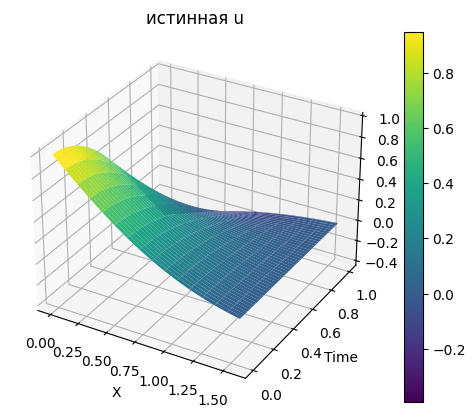

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(U_true_m), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('истинная u')
fig.colorbar(surf)

Схема Кранка-Николсона

In [ ]:
def K_N(x,t, Yav, Neyav):
  U_3 = np.zeros((len(t),len(x)))
  for k in range(len(t)):
    for j in range(len(x)):
      U_3[k,j] = 0.5* Yav[k,j] + 0.5 * Neyav[k,j]
  return U_3


In [ ]:
df = pd.DataFrame(data=K_N(x,t, first_method(x,t,tau,h), second_method(x,t,tau,h)), index=t, columns=x)
df

,0.000000,0.104720,0.209440,0.314159,0.418879,0.523599,0.628319,0.733038,0.837758,0.942478,1.047198,1.151917,1.256637,1.361357,1.466077,1.570796
0.000000,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,1.272895e-17
0.004525,1.000000,0.895643,0.793316,0.694654,0.600915,0.513020,0.431601,0.357042,0.289519,0.229037,0.175460,0.128541,0.087949,0.053290,0.024128,1.272895e-17
0.009050,0.999836,0.895569,0.793250,0.694597,0.600866,0.512978,0.431566,0.357013,0.289496,0.229019,0.175446,0.128531,0.087942,0.053286,0.024127,0.000000e+00
0.013575,0.999631,0.895421,0.793119,0.694483,0.600768,0.512894,0.431495,0.356955,0.289449,0.228982,0.175418,0.128511,0.087929,0.053279,0.024124,0.000000e+00
0.018100,0.999345,0.895199,0.792923,0.694312,0.600620,0.512769,0.431390,0.356868,0.289379,0.228927,0.175376,0.128480,0.087908,0.053267,0.024119,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.981900,-0.382966,-0.341135,-0.300661,-0.262067,-0.225642,-0.191682,-0.160504,-0.132126,-0.106611,-0.084017,-0.064198,-0.046970,-0.032153,-0.019513,-0.008859,0.000000e+00
0.986425,-0.391310,-0.348593,-0.307255,-0.267832,-0.230629,-0.195938,-0.164094,-0.135118,-0.109060,-0.085966,-0.065696,-0.048072,-0.032910,-0.019973,-0.009068,0.000000e+00
0.990950,-0.399622,-0.356021,-0.313825,-0.273575,-0.235597,-0.200180,-0.167670,-0.138099,-0.111500,-0.087909,-0.067189,-0.049170,-0.033665,-0.020433,-0.009277,0.000000e+00
0.995475,-0.407901,-0.363421,-0.320368,-0.279296,-0.240545,-0.204405,-0.171233,-0.141069,-0.113931,-0.089844,-0.068677,-0.050264,-0.034417,-0.020890,-0.009486,0.000000e+00


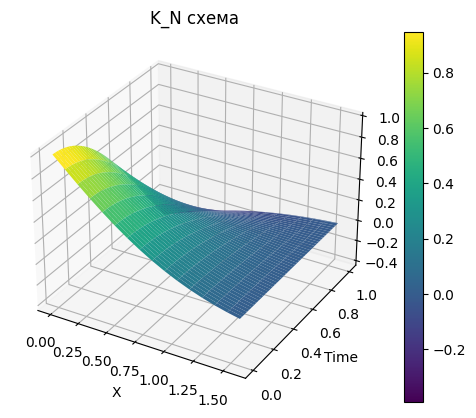

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(second_method(x,t,tau,h)), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('K_N схема')
fig.colorbar(surf)

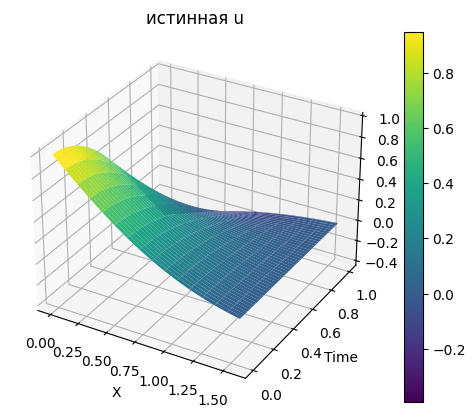

In [ ]:
x_mesh, t_mesh = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x_mesh, t_mesh, np.array(U_true_m), cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Time')
ax.set_zlabel('Value')
ax.set_title('истинная u')
fig.colorbar(surf)

In [ ]:
def epsilon(U_have, U_find):
  toch = 0
  eps = []
  for i in range(len(U_have[0])):
      eps.append(abs(U_find[-1, i] - U_have[-1, i]))
  print(eps)
  error = max(eps)
  return error

In [ ]:
epsilon(U_true_m, first_method(x,t,tau,h))

[0.0, 0.0018242410275822185, 0.0033334993834570614, 0.00444283915371757, 0.005344323062082101, 0.006028310931789488, 0.006229741115937298, 0.00623779288377449, 0.006022873288957981, 0.005374348139857363, 0.004411300352312242, 0.0033261516151642107, 0.002257460782454944, 0.0013346468616874975, 0.0005772352738091808, 5.297113477441226e-18]


0.00623779288377449

In [ ]:
epsilon(U_true_m, second_method(x,t,tau,h))

[0.0, 0.00481127650006008, 0.008160480345187071, 0.01029810648511098, 0.011510860796508482, 0.011950905885884266, 0.011711111935307494, 0.011008789212964776, 0.009926493227490396, 0.0084796803045923, 0.006809279414902281, 0.005099612497540033, 0.0034923379429263185, 0.0020868891427765664, 0.00092025987497984, 5.297113477441226e-18]


0.011950905885884266

In [ ]:
epsilon(U_true_m, K_N(x,t,first_method(x,t,tau,h), second_method(x,t,tau,h)))

[0.0, 0.003317758763821177, 0.005746989864322094, 0.0073704728194142755, 0.008427591929295292, 0.008989608408836863, 0.008970426525622383, 0.008623291048369619, 0.007974683258224188, 0.006927014222224831, 0.005610289883607261, 0.0042128820563521185, 0.0028748993626906277, 0.001710768002232032, 0.0007487475743945104, 5.297113477441226e-18]


0.008989608408836863

In [ ]:
H = [0.1, 0.05, 0.025, 0.0125]
sigma =0.9
error_first = []
error_second = []
error_k_n = []
for i in range(len(H)):
  tau = math.sqrt(sigma) * H[i]
  x = np.linspace(0, l, round(l/H[i]))
  t = np.linspace(0, 1, round(1/tau))
  U_have = np.zeros((len(t),len(x)))
  for k in range(len(t)):
    for j in range(len(x)):
      U_have[k, j] = U_true(x[j], t[k])
  U_1=first_method(x,t,tau,H[i])
  U_2=second_method(x,t,tau,H[i])
  U_3 = K_N(x,t,U_1, U_2)
  print("U1")
  error_first.append(epsilon(U_have, U_1))
  print("U2")
  error_second.append(epsilon(U_have, U_2))
  print("U3")
  error_k_n.append(epsilon(U_have, U_3))



U1
[0.0, 0.009540368025450663, 0.016733413593485846, 0.02548306676183071, 0.0290341593621547, 0.03556723402601514, 0.036937887371904815, 0.03705480898300367, 0.04502900775507834, 0.04219553924305815, 0.03256832353058318, 0.023962555409060542, 0.01643866320987957, 0.009958819302350697, 0.004500533821154338, 5.297113477441226e-18]
U2
[0.0, 0.04166420263264897, 0.06932553966859994, 0.08580256921700699, 0.09365290862579218, 0.09492201825523496, 0.09115343163667769, 0.08361096230118449, 0.07345471839561504, 0.06177328672249423, 0.04952887896837109, 0.03749728076593922, 0.026242920821902584, 0.016130247114706654, 0.007357543541116529, 5.297113477441226e-18]
U3
[0.0, 0.02560228532904979, 0.043029476631042896, 0.055642817989418836, 0.06134353399397344, 0.06524462614062504, 0.06404565950429125, 0.060332885642094075, 0.05924186307534669, 0.05198441298277619, 0.04104860124947714, 0.030729918087499884, 0.021340792015891077, 0.013044533208528674, 0.005929038681135434, 5.297113477441226e-18]
U1
[0.0

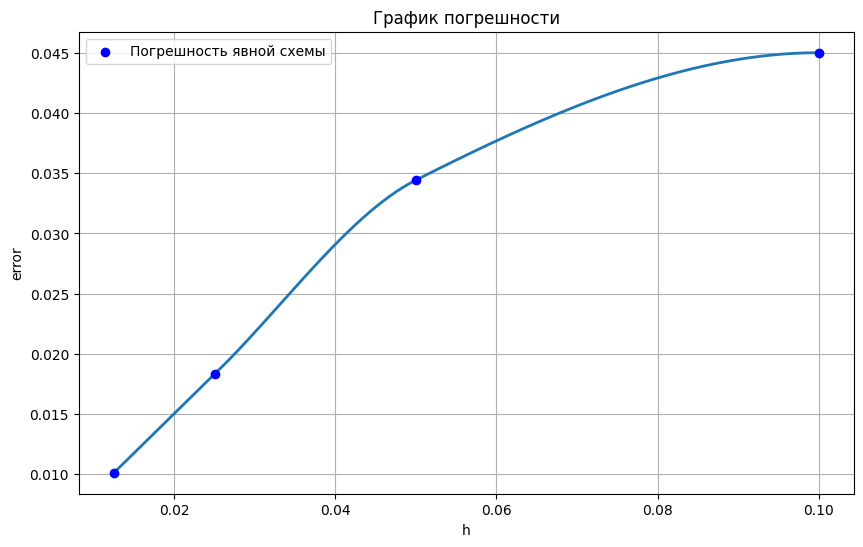

In [ ]:
from scipy.interpolate import PchipInterpolator

Y_reverse = error_first[::-1]
X_reverse = H[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность явной схемы', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()

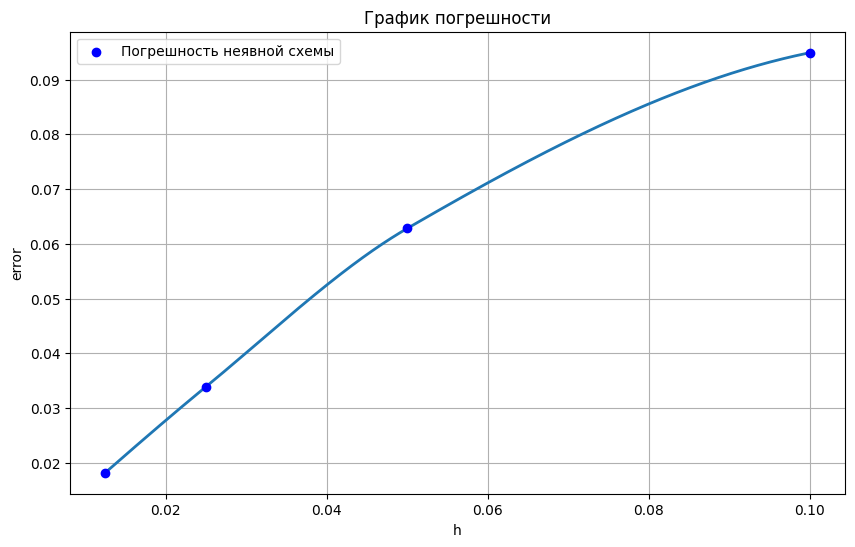

In [ ]:
Y_reverse = error_second[::-1]
X_reverse = H[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность неявной схемы', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()

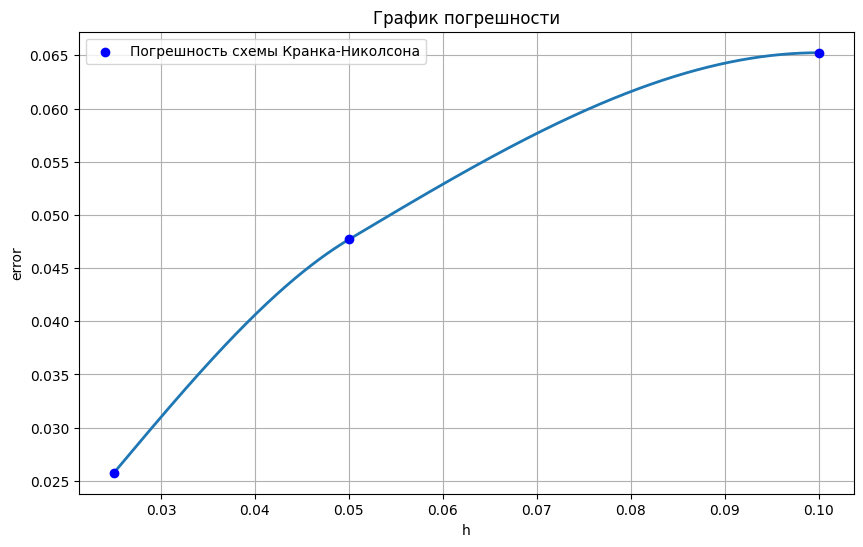

In [ ]:
Y_reverse = error_k_n[::-1]
X_reverse = H[::-1]

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность схемы Кранка-Николсона', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()